# Milestone 2 - Fortune 1000 CSV

In [18]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
# Read in csv file from Kaggle
# https://www.kaggle.com/datasets/ramjasmaurya/fortune-1000-companieslatest?select=fortune+1000+companies+in+dec2021.csv
# Read index from file instead of creating new one
fortune_comp = pd.read_csv('data/fortune_1000_companies.csv',index_col=0)

In [20]:
# 12 columns, 1000 records
fortune_comp.shape

(1000, 12)

In [21]:
# View first 5 records
fortune_comp.head()

,Rank,Name,Revenue,revenue(% change),profits in millions,profits % change,assets,market value,change in rank in 1000,employees,change in rank(500 only),measure_up_rank
0,1,Walmart,"$559,151",0.067,"$13,510",-0.092,"$252,496","$382,642.8",-,2300000,-,20
1,2,Amazon,"$386,064",0.376,"$21,331",0.841,"$321,195","$1,558,069.6",-,1298000,-,11
2,3,Apple,"$274,515",0.055,"$57,411",0.039,"$323,888","$2,050,665.9",1,147000,1,188
3,4,CVS Health,"$268,706",0.046,"$7,179",0.082,"$230,715","$98,653.2",1,256500,1,57
4,5,UnitedHealth Group,"$257,141",0.062,"$15,403",0.113,"$197,289","$351,725",2,330000,2,25


In [22]:
# View last 5 records
fortune_comp.tail()

,Rank,Name,Revenue,revenue(% change),profits in millions,profits % change,assets,market value,change in rank in 1000,employees,change in rank(500 only),measure_up_rank
995,996,Surgery Partners,"$1,860.1",0.016,$-116.1,-,"$5,413.2","$2,649.4",-,9950,-,-
996,997,Entegris,"$1,859.3",0.169,$295,0.157,"$2,917.7","$15,120.7",-,5800,-,-
997,998,Sleep Number,"$1,856.6",0.093,$139.2,0.701,$800.1,"$3,560.3",-,4625,-,-
998,999,Spire,"$1,855.4",-0.05,$88.6,-0.52,"$8,241.2","$3,817.5",-,3583,-,-
999,1000,Clear Channel Outdoor Holdings,"$1,854.6",-0.309,$-582.7,-,"$5,755.3",$842.1,-158,4800,-,-


In [23]:
# Due to currency formatting only two columns have a numeric data type
fortune_comp.describe()

,Rank,employees
count,1000.000000,1.000000e+03
mean,500.498000,3.464337e+04
std,288.819214,9.953723e+04
min,1.000000,1.200000e+02
25%,250.750000,6.429500e+03
50%,500.500000,1.262000e+04
75%,750.250000,2.901250e+04
max,1000.000000,2.300000e+06


# Cleaning Steps

## Step 1: Rename Column Headers

In [24]:
new_column_headers = {'Rank': 'rank',
                      'Name': 'name',
                      'Revenue': 'rev',
                      'revenue(% change)': 'rev_change',
                      'profits in millions': 'profit',
                      'profits % change': 'profit_change',
                      'market value': 'market',
                      'change in rank in 1000': 'rank_change_1000',
                      'employees': 'emp',
                      'change in rank(500 only)':'rank_change_500',
                      'measure_up_rank': 'rank_measure'}

In [25]:
# Rename columns based on list above and replace
fortune_comp.rename(columns=new_column_headers, inplace=True)

In [26]:
fortune_comp.head()

,rank,name,rev,rev_change,profit,profit_change,assets,market,rank_change_1000,emp,rank_change_500,rank_measure
0,1,Walmart,"$559,151",0.067,"$13,510",-0.092,"$252,496","$382,642.8",-,2300000,-,20
1,2,Amazon,"$386,064",0.376,"$21,331",0.841,"$321,195","$1,558,069.6",-,1298000,-,11
2,3,Apple,"$274,515",0.055,"$57,411",0.039,"$323,888","$2,050,665.9",1,147000,1,188
3,4,CVS Health,"$268,706",0.046,"$7,179",0.082,"$230,715","$98,653.2",1,256500,1,57
4,5,UnitedHealth Group,"$257,141",0.062,"$15,403",0.113,"$197,289","$351,725",2,330000,2,25


In Step 1, I renamed the columns of the dataset to make it easier to work with for the following transformations.

## Step 2: Find and replace "-" values to zero

In [27]:
# Find column data types
fortune_comp.dtypes

rank                 int64
name                object
rev                 object
rev_change          object
profit              object
profit_change       object
assets              object
market              object
rank_change_1000    object
emp                  int64
rank_change_500     object
rank_measure        object
dtype: object

In [28]:
print("The following contained empty values that were replaced with 0:")
# For each column that is an object
for x in fortune_comp.iloc[:, np.r_[2:9,10:12]]: 
    # Check if contains - character
    if(fortune_comp[x].str.contains('-').values.any()):
        # Replace with 0
        fortune_comp.loc[(fortune_comp[x] == "-"),x] = "0"
        print("{}".format(x)) # Print if - character was replaced

The following contained empty values that were replaced with 0:
rev_change
profit
profit_change
market
rank_change_1000
rank_change_500
rank_measure


In [31]:
# Validate change
fortune_comp.head()

,rank,name,rev,rev_change,profit,profit_change,assets,market,rank_change_1000,emp,rank_change_500,rank_measure
0,1,Walmart,"$559,151",0.067,"$13,510",-0.092,"$252,496","$382,642.8",0,2300000,0,20
1,2,Amazon,"$386,064",0.376,"$21,331",0.841,"$321,195","$1,558,069.6",0,1298000,0,11
2,3,Apple,"$274,515",0.055,"$57,411",0.039,"$323,888","$2,050,665.9",1,147000,1,188
3,4,CVS Health,"$268,706",0.046,"$7,179",0.082,"$230,715","$98,653.2",1,256500,1,57
4,5,UnitedHealth Group,"$257,141",0.062,"$15,403",0.113,"$197,289","$351,725",2,330000,2,25


In Step 2, I found all the places that a "-" was entered to indicate a missing value and replace it with zero. Based on the dataset pulled I can infer that the missing data should be a zero because no change was found.

## Step 3: Remove Currency Formatting

In [32]:
# Remove currency format from columns
def clean_currency(x):
    return(x.replace('$', '').replace(',', ''))

In [34]:
# apply clean currency function on columns with currency formatting
for x in fortune_comp.iloc[:, np.r_[2,4,6:8]]: 
    fortune_comp[x] = fortune_comp[x].apply(clean_currency)

In [35]:
fortune_comp.head()

,rank,name,rev,rev_change,profit,profit_change,assets,market,rank_change_1000,emp,rank_change_500,rank_measure
0,1,Walmart,559151,0.067,13510,-0.092,252496,382642.8,0,2300000,0,20
1,2,Amazon,386064,0.376,21331,0.841,321195,1558069.6,0,1298000,0,11
2,3,Apple,274515,0.055,57411,0.039,323888,2050665.9,1,147000,1,188
3,4,CVS Health,268706,0.046,7179,0.082,230715,98653.2,1,256500,1,57
4,5,UnitedHealth Group,257141,0.062,15403,0.113,197289,351725,2,330000,2,25


In Step 3, I removed the currency formatting of the revenue, profit, assets, and market columns.

## Step 4: Convert data type of columns

In [36]:
# Change associated columns to float when currency or requires decimal
for x in fortune_comp.iloc[:, np.r_[2:8]]: 
    fortune_comp[x] = fortune_comp[x].astype(float)

In [37]:
# Change ranks to int
for x in fortune_comp.iloc[:, np.r_[8:12]]: 
    fortune_comp[x] = fortune_comp[x].astype(int)

In [39]:
# Validate data types
fortune_comp.dtypes

rank                  int64
name                 object
rev                 float64
rev_change          float64
profit              float64
profit_change       float64
assets              float64
market              float64
rank_change_1000      int32
emp                   int32
rank_change_500       int32
rank_measure          int32
dtype: object

With the currency formatting removed, Step 4 was to change the data type of the columns for further analysis.

## Step 5: Check for Duplicate Names

In [41]:
# Check if duplicate company records
if any(fortune_comp.name.duplicated()):
    print('Duplicate company name records were found')
else:
    print("No company records were duplicated.")

No company records were duplicated.


In step 5, I checked if any company records were duplicated in the dataset.

## Step 6: Check for Outliers

In [42]:
# Describe numeric fields
# Min, 25%, 50%, 75%, and max shows a pretty large range of values
fortune_comp.describe()

,rank,rev,rev_change,profit,profit_change,assets,market,rank_change_1000,emp,rank_change_500,rank_measure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.498000,15356.918100,0.004597,909.095500,-0.341121,5.596322e+04,3.793641e+04,1.416000,3.464337e+04,1.830000,105.825000
std,288.819214,35764.171312,0.358660,4155.482565,6.120257,2.432921e+05,1.250438e+05,77.008462,9.953723e+04,26.227371,143.933315
min,1.000000,1854.600000,-0.839000,-22440.000000,-78.656000,7.580000e+02,0.000000e+00,-719.000000,1.200000e+02,-214.000000,0.000000
25%,250.750000,2959.775000,-0.104250,0.000000,-0.461500,4.380725e+03,3.532400e+03,-13.000000,6.429500e+03,0.000000,0.000000
50%,500.500000,5362.500000,-0.016000,282.600000,-0.012000,9.907400e+03,1.014230e+04,4.000000,1.262000e+04,0.000000,0.000000
75%,750.250000,12126.000000,0.071000,820.100000,0.136000,2.980050e+04,2.952953e+04,30.000000,2.901250e+04,2.000000,213.250000
max,1000.000000,559151.000000,7.110000,57411.000000,124.387000,3.985749e+06,2.050666e+06,348.000000,2.300000e+06,139.000000,454.000000


In [75]:
# Find outliers for revenue
rev_z_score = stats.zscore(fortune_comp.rev)
rev_outliers = fortune_comp[(rev_z_score > 3)]
rev_outliers.iloc[:, 0:3]
# Dataset shows the first 21 records of dataset. The higher z-score is probably because of varying company performance.
# No outliers to remove.

,rank,name,rev
0,1,Walmart,559151.0
1,2,Amazon,386064.0
2,3,Apple,274515.0
3,4,CVS Health,268706.0
4,5,UnitedHealth Group,257141.0
5,6,Berkshire Hathaway,245510.0
6,7,McKesson,231051.0
7,8,AmerisourceBergen,189893.9
8,9,Alphabet,182527.0
9,10,Exxon Mobil,181502.0


In [76]:
# Find outliers for revenue change
rev_change_score = stats.zscore(fortune_comp.rev_change)
rev_change_outliers = fortune_comp[(rev_change_score > 3)]
rev_change_outliers.iloc[:, 0:4]
# The outliers below still seem within a good range. The Franchise Group stands out with 7.11, but it's still a possible outcome.
# No outliers removed

,rank,name,rev,rev_change
193,194,Rocket Companies,15980.7,2.043
500,501,Cleveland-Cliffs,5354.0,1.691
528,529,UWM Holdings,4938.6,2.863
582,583,loanDepot,4443.6,2.028
703,704,Virtu Financial,3239.3,1.117
769,769,DoorDash,2886.0,2.261
809,810,Zoom Video Communications,2651.4,3.258
917,918,Seagen,2175.5,1.373
923,924,Franchise Group,2152.5,7.110


In [97]:
# Find outliers for profit
profit_z_score = stats.zscore(fortune_comp.profit)
profit_outliers = fortune_comp[(profit_z_score > 3)]
profit_outliers.iloc[:, np.r_[0:2,4]]
# Profit seems within an acceptable range.
# No outliers removed

,rank,name,profit
0,1,Walmart,13510.0
1,2,Amazon,21331.0
2,3,Apple,57411.0
4,5,UnitedHealth Group,15403.0
5,6,Berkshire Hathaway,42521.0
8,9,Alphabet,40269.0
14,15,Microsoft,44281.0
18,19,JPMorgan Chase,29131.0
19,20,Verizon Communications,17801.0
28,29,Bank of America,17894.0


In [90]:
# Find outliers for profit change
profit_change_z_score = stats.zscore(fortune_comp.profit_change)
profit_change_outliers = fortune_comp[(profit_change_z_score > 3)]
profit_change_outliers.iloc[:, np.r_[0:2, 4:6]]
# NortonLifeLock stands out for profit change, but it is still possible for the change to increase 124% especially for growing companies
# No outliers removed

,rank,name,profit,profit_change
6,7,McKesson,900.0,25.471
136,137,Salesforce,4072.0,31.317
582,583,loanDepot,2013.1,57.487
630,631,NortonLifeLock,3887.0,124.387
809,810,Zoom Video Communications,672.3,25.569


In [96]:
# Find outliers for assets
assets_z_score = stats.zscore(fortune_comp.assets)
assets_outliers = fortune_comp[(assets_z_score > 3)]
assets_outliers.iloc[:, np.r_[0:2,6]]
# Asset numbers still seem to be within an acceptable range in terms of the number of digits. 
# No outliers removed

,rank,name,assets
5,6,Berkshire Hathaway,873729.0
18,19,JPMorgan Chase,3386071.0
24,25,Fannie Mae,3985749.0
28,29,Bank of America,2819627.0
32,33,Citigroup,2260090.0
36,37,Wells Fargo,1955163.0
45,46,MetLife,795146.0
46,47,Freddie Mac,2627415.0
54,55,Prudential Financial,940722.0
58,59,Goldman Sachs Group,1163028.0


In [98]:
# Find outliers for market
cos_arr_z_score = stats.zscore(fortune_comp.market)
cos_arr_outliers = fortune_comp[(cos_arr_z_score > 3)]
cos_arr_outliers.iloc[:, np.r_[0:2,7]]
# Market appears to be within range
# No outliers removed

,rank,name,market
1,2,Amazon,1558069.6
2,3,Apple,2050665.9
5,6,Berkshire Hathaway,587823.0
8,9,Alphabet,1392561.8
14,15,Microsoft,1778228.2
18,19,JPMorgan Chase,464530.8
33,34,Meta Platforms,838724.2
35,36,Johnson & Johnson,432685.3
99,100,Tesla,641115.0
132,133,Visa,452525.4


In [59]:
# Find outliers for rank change 1000
# Outliers will be described as half of the number of ranks
rank_change_1000_outliers = fortune_comp[(fortune_comp.rank_change_1000 > 500)]
if(rank_change_1000_outliers.shape[0] != 0):
    rank_change_1000_outliers
else:
    print("No outliers found.")
# Rank changes are less than 500
# No outliers removed

No outliers found.


In [99]:
# Find outliers for emp
emp_z_score = stats.zscore(fortune_comp.emp)
emp_outliers = fortune_comp[(emp_z_score > 3)]
emp_outliers.iloc[:, np.r_[0:2,9]]
# Number of employees seem to be in an acceptable range
# No outliers removed

,rank,name,emp
0,1,Walmart,2300000
1,2,Amazon,1298000
5,6,Berkshire Hathaway,360000
16,17,Kroger,465000
17,18,Home Depot,504800
29,30,Target,409000
34,35,United Parcel Service,408255
41,42,International Business Machines,364800
44,45,FedEx,418000
124,125,Starbucks,349000


In [58]:
# Find outliers for rank change 500
# Outliers will be described as half of the number of ranks
rank_change_500_outliers = fortune_comp[(fortune_comp.rank_change_500 > 250)]
if(rank_change_500_outliers.shape[0] != 0):
    rank_change_500_outliers
else:
    print("No outliers found.")
# Rank changes are less than 250
# No outliers removed

No outliers found.


{'whiskers': [<matplotlib.lines.Line2D at 0x1bf0efbce20>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf0ee4c400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf0efbcb80>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf0ee4c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf0ee4cc70>],
 'means': []}

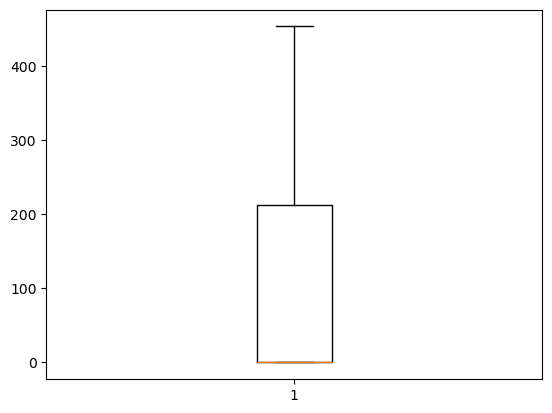

In [29]:
# Find outliers for rank measure
# Although a long tail between 200-400, it is still within range
plt.boxplot(fortune_comp.rank_measure)

Step 6 consisted of determining which values were outside of the normal (> 3). After reviewing the records that were found, it was clear that the differences between the values had to do with the performance of the company instead of being significant outliers.

# Transformed Dataset

In [60]:
# 12 columns, 1000 rows
# No change of number of records
fortune_comp.shape

(1000, 12)

In [61]:
# First 10 records
fortune_comp.head(10)

,rank,name,rev,rev_change,profit,profit_change,assets,market,rank_change_1000,emp,rank_change_500,rank_measure
0,1,Walmart,559151.0,0.067,13510.0,-0.092,252496.0,382642.8,0,2300000,0,20
1,2,Amazon,386064.0,0.376,21331.0,0.841,321195.0,1558069.6,0,1298000,0,11
2,3,Apple,274515.0,0.055,57411.0,0.039,323888.0,2050665.9,1,147000,1,188
3,4,CVS Health,268706.0,0.046,7179.0,0.082,230715.0,98653.2,1,256500,1,57
4,5,UnitedHealth Group,257141.0,0.062,15403.0,0.113,197289.0,351725.0,2,330000,2,25
5,6,Berkshire Hathaway,245510.0,-0.036,42521.0,-0.478,873729.0,587823.0,0,360000,0,0
6,7,McKesson,231051.0,0.078,900.0,25.471,61247.0,31044.0,1,70000,1,205
7,8,AmerisourceBergen,189893.9,0.057,-3408.7,-4.985,44274.8,24169.7,2,21500,2,120
8,9,Alphabet,182527.0,0.128,40269.0,0.173,319616.0,1392561.8,2,135301,2,215
9,10,Exxon Mobil,181502.0,-0.315,-22440.0,-2.565,332750.0,236355.4,-7,72000,-7,327


In [63]:
# Describe Dataset
fortune_comp.describe()

,rank,rev,rev_change,profit,profit_change,assets,market,rank_change_1000,emp,rank_change_500,rank_measure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.498000,15356.918100,0.004597,909.095500,-0.341121,5.596322e+04,3.793641e+04,1.416000,3.464337e+04,1.830000,105.825000
std,288.819214,35764.171312,0.358660,4155.482565,6.120257,2.432921e+05,1.250438e+05,77.008462,9.953723e+04,26.227371,143.933315
min,1.000000,1854.600000,-0.839000,-22440.000000,-78.656000,7.580000e+02,0.000000e+00,-719.000000,1.200000e+02,-214.000000,0.000000
25%,250.750000,2959.775000,-0.104250,0.000000,-0.461500,4.380725e+03,3.532400e+03,-13.000000,6.429500e+03,0.000000,0.000000
50%,500.500000,5362.500000,-0.016000,282.600000,-0.012000,9.907400e+03,1.014230e+04,4.000000,1.262000e+04,0.000000,0.000000
75%,750.250000,12126.000000,0.071000,820.100000,0.136000,2.980050e+04,2.952953e+04,30.000000,2.901250e+04,2.000000,213.250000
max,1000.000000,559151.000000,7.110000,57411.000000,124.387000,3.985749e+06,2.050666e+06,348.000000,2.300000e+06,139.000000,454.000000


# Ethical Implications

The Fortune 1000 company dataset consists of values reported by the company in areas such as revenue, profit, assets, and more. There are ethical concerns on the assumption that the self reported values given by the companies are accurate. When performing transformations of the data, it was assumed the missing values meant that no change was recorded for that company. There was also an assumption that the varying difference between each company record had to do with the individual company performance instead of an outlier. This list was created by the Fortune website to produce a gauge of the current performance of the company listed. It is not accurate representation if one company should be invested in or not.